In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.columns = df.columns.str.replace(' ', '_')

In [3]:
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [5]:
daily_sales = (
    df.groupby(df['Date'].dt.date)['Total_Amount']
    .sum()
    .reset_index()
)

daily_sales.columns = ['Date', 'Total_Amount']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales.head()


,Date,Total_Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100


In [6]:
import matplotlib.pyplot as plt

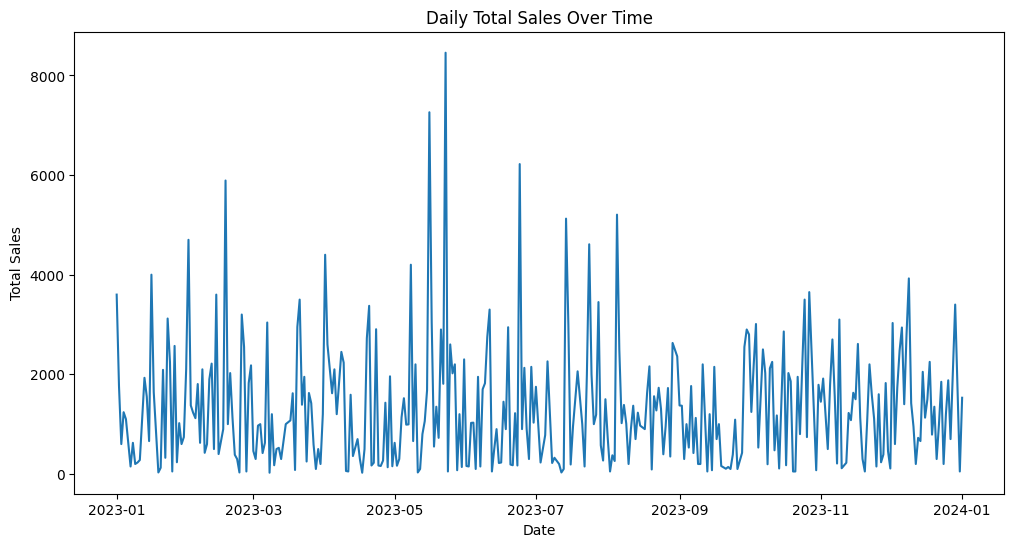

In [7]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Total_Amount'])
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


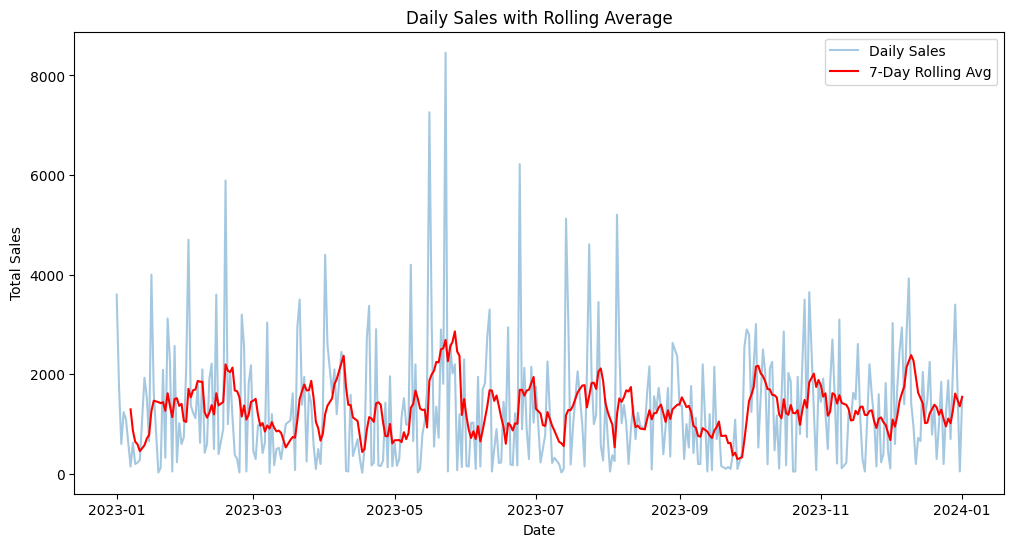

In [8]:
daily_sales['Rolling_7'] = daily_sales['Total_Amount'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Total_Amount'], alpha=0.4, label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['Rolling_7'], color='red', label='7-Day Rolling Avg')
plt.title("Daily Sales with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


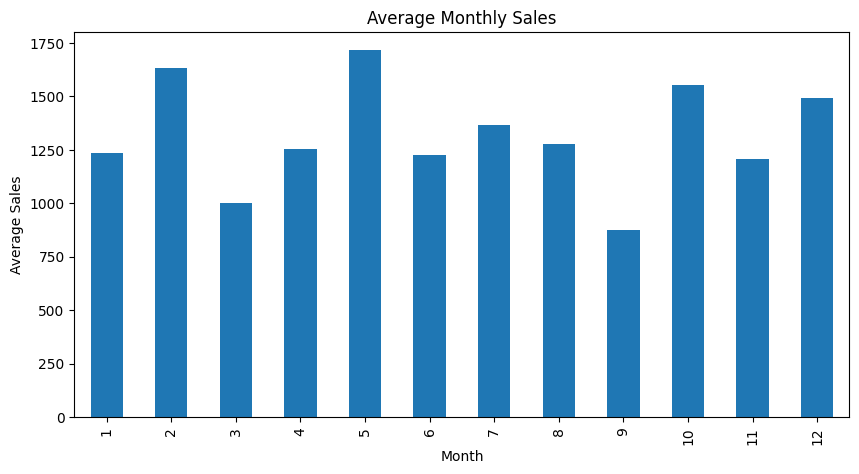

In [9]:
daily_sales['Month'] = daily_sales['Date'].dt.month

monthly_sales = daily_sales.groupby('Month')['Total_Amount'].mean()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar')
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


In [10]:
daily_sales = daily_sales.set_index('Date')


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decomposition = seasonal_decompose(
    daily_sales['Total_Amount'],
    model='additive',
    period=7
)
